In [1]:
!wget -O cars.mp4 https://github.com/feat7/learning-computer-vision/blob/master/data/basic-videos/cars.mp4?raw=true
!wget -O airplanes.mp4 https://github.com/feat7/learning-computer-vision/blob/master/data/basic-videos/airplanes.mp4?raw=true

--2021-06-26 13:09:26--  https://github.com/feat7/learning-computer-vision/blob/master/data/basic-videos/cars.mp4?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/feat7/learning-computer-vision/raw/master/data/basic-videos/cars.mp4 [following]
--2021-06-26 13:09:26--  https://github.com/feat7/learning-computer-vision/raw/master/data/basic-videos/cars.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/feat7/learning-computer-vision/master/data/basic-videos/cars.mp4 [following]
--2021-06-26 13:09:26--  https://raw.githubusercontent.com/feat7/learning-computer-vision/master/data/basic-videos/cars.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.gi

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

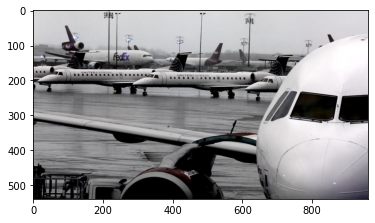

In [3]:
video = cv2.VideoCapture("airplanes.mp4")

ret1, frame1 = video.read()
ret2, frame2 = video.read()

plt.imshow(frame1)

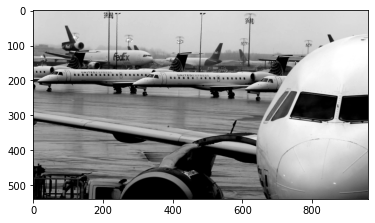

In [4]:
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

plt.imshow(frame1_gray, cmap = 'gray')

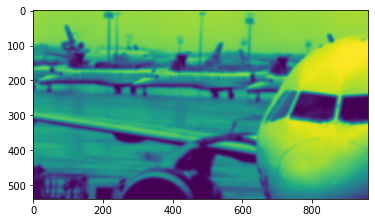

In [5]:
frame1_blur = cv2.GaussianBlur(frame1_gray, (21, 21), 0)
frame2_blur = cv2.GaussianBlur(frame2_gray, (21, 21), 0)

plt.imshow(frame1_blur)

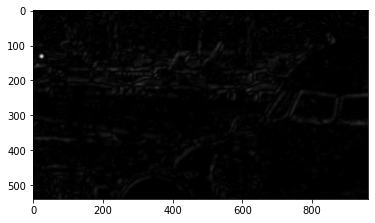

In [6]:
diff = cv2.absdiff(frame1_blur, frame2_blur)

plt.imshow(diff, cmap = 'gray')

(540, 960)


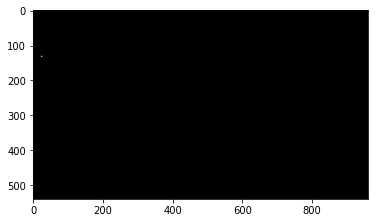

In [7]:
_, thresh = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)

print(thresh.shape)
plt.imshow(thresh, cmap = 'gray')

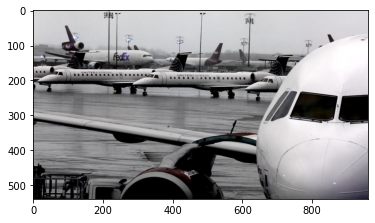

In [8]:
white_pixels = np.sum(thresh) / 255

rows, cols = thresh.shape
total_pixels = rows * cols

if white_pixels > 0.05 * total_pixels:
  cv2.putText(frame1, 'Motion Detected', (10, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

plt.imshow(frame1)

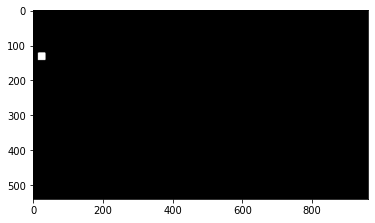

In [9]:
dilate = cv2.dilate(thresh, None, iterations = 9)

plt.imshow(dilate, cmap='gray')

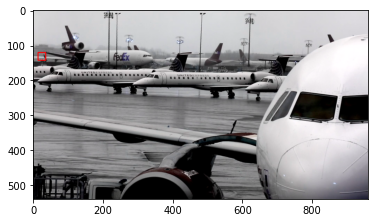

In [10]:
contours, _ = cv2.findContours(dilate, 1, 2)
display = frame2.copy()

for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)

  cv2.rectangle(display, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(display)